# 1929年 ~ 2019年までの太陽黒点数で, FFT を使用した周期データの解析を行う.

In [53]:
import pandas as pd 
import seaborn as sns
import os
import numpy as np 
from numpy.fft import fftn, fftfreq
import matplotlib.pyplot as plt 
%matplotlib inline

## データの可視化
---

国立天文台三鷹キャンパスが観測している太陽黒点数の年平均値のデータを使用.<br><br>
[太陽観測データ](https://solarwww.mtk.nao.ac.jp/jp/db_sunspot.html)<br>
[年平均値のデータ](https://solarwww.mtk.nao.ac.jp/mitaka_solar1/data03/sunspots/number/mtkannual.txt)

In [60]:
# 1929年 ~ 2019年の太陽黒点数・年平均値
data_kokuten = pd.Series([77.65, 42.95, 23.83, 10.66, 5.04, 8.44, 56.10, 74.65, 106.09, 125.31,       # 1929年 ~ 1938年
                          99.92, 73.75, 50.51, 31.85, 16.89, 8.21, 28.34, 90.16, 163.89, 151.77,      # 1939年 ~ 1948年
                          150.47, 87.18, 62.10, 29.02, 12.50, 4.63, 37.24, 124.54, 162.25, 171.88,    # 1949年 ~ 1958年
                          146.89, 110.22, 50.70, 31.86, 22.71, 9.29, 14.35, 43.48, 95.39, 99.83,      # 1959年 ~ 1968年
                          101.02, 120.26, 83.57, 82.45, 45.13, 36.92, 18.12, 13.67, 31.00, 108.47,    # 1969年 ~ 1978年
                          171.97, 160.91, 168.31, 140.02, 82.42, 58.40, 19.29, 10.73, 25.72, 92.04,   # 1979年 ~ 1988年
                          155.49, 160.23, 172.34, 99.69, 54.83, 29.96, 16.31, 7.71, 17.27, 58.95,     # 1989年 ~ 1998年
                          89.51, 111.17, 102.45, 108.27, 66.26, 45.40, 31.95, 17.45, 9.89, 3.78,      # 1999年 ~ 2008年
                          3.94, 21.01, 63.33, 67.19, 77.91, 92.76, 58.02, 32.57, 17.33, 4.50, 3.80])  # 2009年 ~ 2019年

<AxesSubplot:title={'center':'Yearly Mean of Sunspot'}, xlabel='Year', ylabel='Count of Sunspot'>

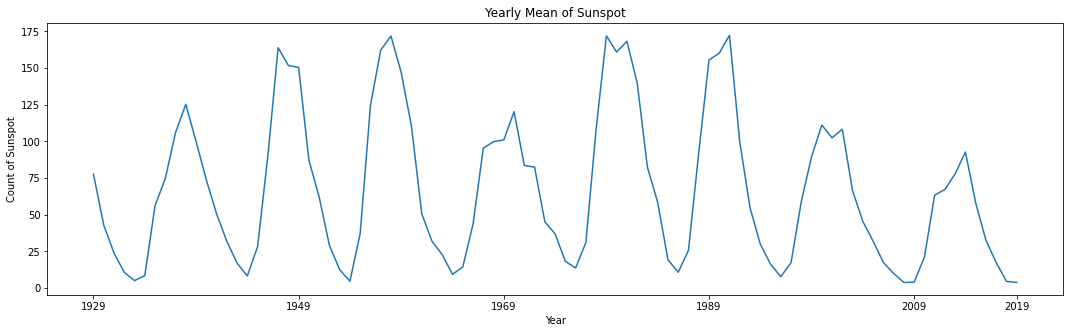

In [61]:
fig, ax = plt.subplots(figsize=(len(data_kokuten) * .20, 5))

tick_l = [0, 20, 40, 60, 80, 90]
label_l = [1929, 1949, 1969, 1989, 2009, 2019]

ax.set(title="Yearly Mean of Sunspot", xlabel="Year", ylabel="Count of Sunspot", xticks=tick_l)
ax.set_xticklabels(label_l)

data_kokuten.plot()

## FFT (高速フーリエ変換) の準備

In [62]:
# データの準備
x = data_kokuten.index
y = data_kokuten.values
n = len(y)

## FFT を使用した周期データの解析
---

- fftn：波形空間からフーリエ変換した強度空間への射影を行う関数. 波形データを代入する.
- fftreq：フーリエ変換した強度関数がどの周波数に対応しているかの周波数を計算する関数. 波形データの総数とサンプリングレート (Hz) を引数にとる.

In [63]:
# FFT
z = fftn(y)
freq = fftfreq(n, d=1.0)

## FFT の出力
---

横軸に周波数もしくは周期をとり, 縦軸にその周波数での強度をとる.<br>
強度各周波数毎に出力されるが, どのぐらいきれいな sin からずれているかの位相遅れ成分が含まれているため, 複素数で表現される.<br>
そのため, 強度として表示する際には絶対値をとることが多い.<br>
また, その際 logscale にして表示するのが一般的.

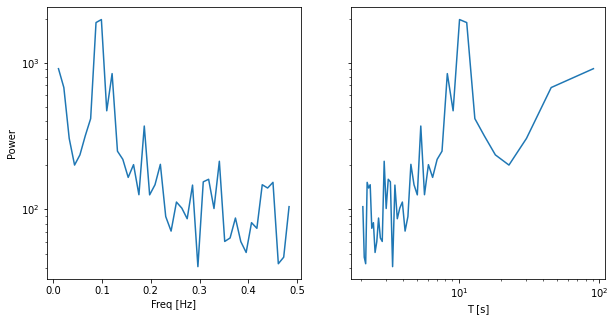

In [64]:
# 周波数 f で表示
fig, axes = plt.subplots(figsize=(10, 5), ncols=2, sharey=True)
ax = axes[0]
ax.plot(freq[1:int(n / 2)], abs(z[1:int(n / 2)]))
ax.set_yscale("log")
ax.set_xlabel("Freq [Hz]")
ax.set_ylabel("Power")

# 周期 T に直して表示
ax = axes[1]
ax.plot(1 / freq[1:int(n / 2)], abs(z[1:int(n / 2)]))
ax.set_yscale("log")
ax.set_xlabel("T [s]")
ax.set_xscale("log")

In [65]:
# 周波数成分の表を降順で表示
data_kokuten_pow = pd.DataFrame([1 / freq[1:int(n / 2)], np.log10(abs(z[1:int(n / 2)]))], index=["T", "log10_power"]).T
data_kokuten_pow.sort_values("log10_power", ascending=False).head(10)

,T,log10_power
8,10.111111,3.294384
7,11.375000,3.273858
0,91.000000,2.959599
10,8.272727,2.926056
1,45.500000,2.831105
9,9.100000,2.672673
6,13.000000,2.619292
16,5.352941,2.568769
5,15.166667,2.502802
2,30.333333,2.484531
